# <u><center>PCA to Visualize Clusters (Practice)
* Authored by : Eric N. Valdez
* Date 3/4/2024

# `Assignment:`
* When clusters are made from more than two features, it is very difficult to visualize the resulting clusters. While 3D plots can be made with Plotly, visualizing more than three features is nearly impossible.
* An interesting solution to this is to use PCA to reduce the dimensionality for the purpose of visualizing the clusters.
* In this assignment, you will combine PCA and clustering to a credit card customer data set and visualize those clusters in both two-dimensional and three-dimensional scatter plots.l:

### <u>Specifically, you will:</u>

# `Imports`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import set_config

#set_config(transform_output='pandas')


* ## `Load the data` ([found here](https://drive.google.com/file/d/1IlQ_OZ4f_S5mdkGXumJNYEWaA6ioeDrr/view))

In [2]:
df = pd.read_csv('Data/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


* ## `Perform basic data cleaning`
    * ### Drop "Unnamed 0" and "Customer ID"
    * ### Fill in missing valueses

In [3]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


### EDA and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [5]:
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [6]:
df.shape

(850, 8)

In [7]:
df.duplicated().sum()

0

* ## `Use the remaining eight features of the dataset to perform KMeans clustering.`
    * ### Be sure to scale the data prior to clustering.
    * ### Determine a value for K (number of clusters) using the elbow method and/or silhouette score.

In [8]:
# Scaling the Data
x_scaled = StandardScaler().fit_transform(df)
x_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

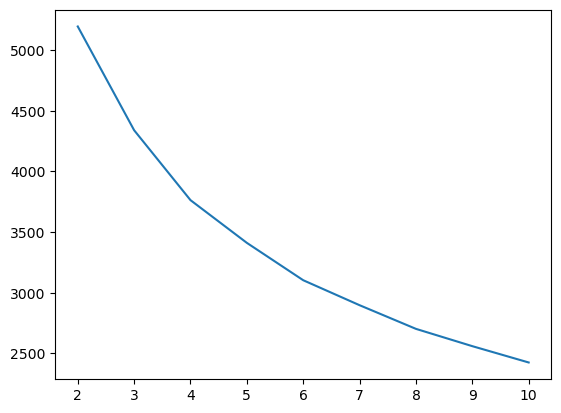

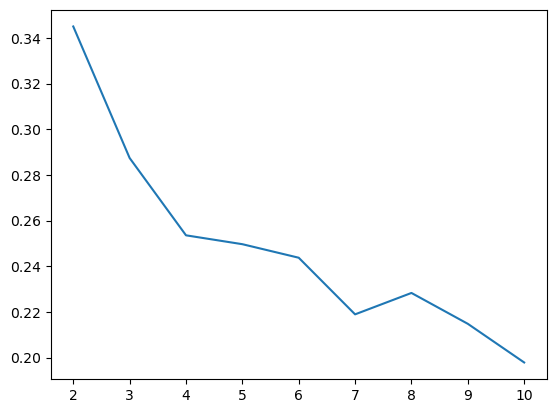

In [9]:
# Determing value for K using the elbow method
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(x_scaled)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(x_scaled, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)

* ## `Use PCA to define two principal components.` 

In [10]:
kmeans_model = KMeans(n_clusters=2)

kmeans_model.fit(x_scaled)

C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

* ## `Visualize the 2 PCs using a scatter plot where points are colored by cluster.`
    * ### While the features (PCs) will no longer be meaningful, you can see how well the model clustered the data.

In [11]:
#Transforming the data
pca = PCA()
pca_df = pca.fit_transform(x_scaled)    

* ## `Use PCA to define three principal components.`

In [15]:
import plotly.express as px

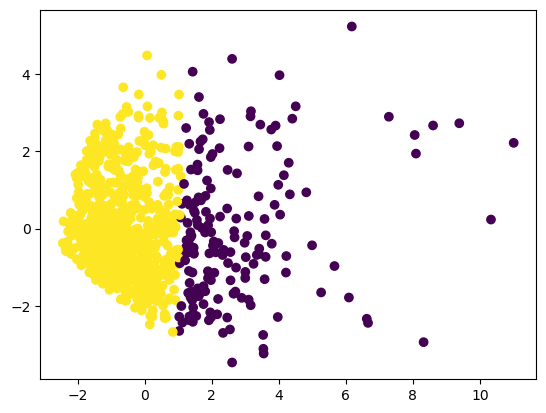

In [16]:
plt.scatter(pca_df[:,0], pca_df[:,1], c = kmeans_model.labels_)

* ## `Visualize the 3 PCs using Plotly's 3d scatterplot, where points are colored by cluster.`

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

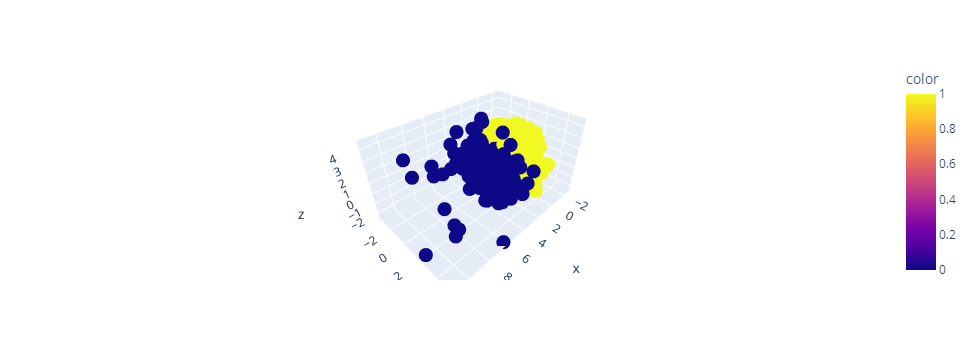

In [17]:
px.scatter_3d(x=pca_df[:,0], y=pca_df[:,1], z=pca_df[:,2], color=kmeans_model.labels_)